In [35]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import integrate
import math

In [36]:
def rand_gener(k, lmb, n):
    res = []
    for j in range(n):
        a = 0
        for i in range(k):
            a = a + (-(1 / lmb) * np.log(np.random.random()))
        res.append(a)
    return res

In [37]:
def gamma_hist(k, lmb, n):
    A, steps, mu, d = [], [], [], []
    res = [0, 1000]
    x_min = x_max = delta = 0
    while min(res) < n: # N = N+1
        A.append(rand_gener(k, lmb, 1)[0]) # формирование случайного числа и добавление его к выборке А
        if len(A) % 100 == 0:
            mu.append(sum(A) / len(A)) # мат ожидание
            d.append(np.var(A)) # дисперсия 
        if len(A) < 1000:
            continue
        elif x_min <= A[-1] <= x_max:
            # 
            bar = int((A[-1] - x_min) / delta)
            res[((bar + 1) * (bar <= len(res) - 1)) - 1] += 1
        if 1 - sum(res) / len(A) < 0.01: # вероятность попадания случайной величины за границы данного интервала < 0.01
            continue
        x_min = min(A) # левая граница минимальный элемент выборки
        x_max = max(A) # правая граница максимальный элемент выборки
        delta = (x_max - x_min) / 10 # делта 
        res = np.zeros(10)  # Количество попавших в res[i] интервал элементов выборки
        # Запронение интервалов гисторгаммы ()
        for i in A:
            bar = int((i - x_min) / delta)
            res[((bar + 1) * (bar <= len(res) - 1)) - 1] += 1

    print(x_min)
    print(x_max)
    return A, mu, d, res

0.40874530766701767
8.228271938710044
[13970. 40276. 42457. 28735. 14735.  6587.  2480.   937.   291.   100.]


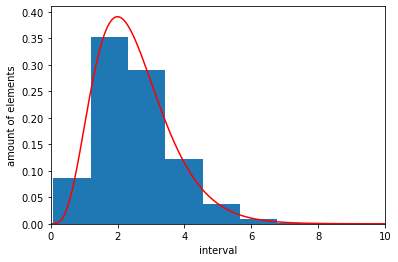

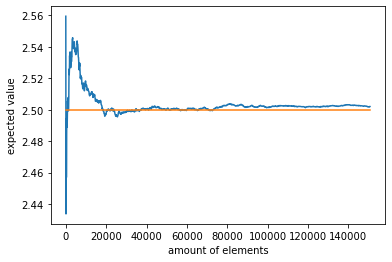

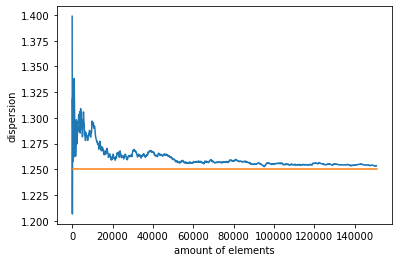

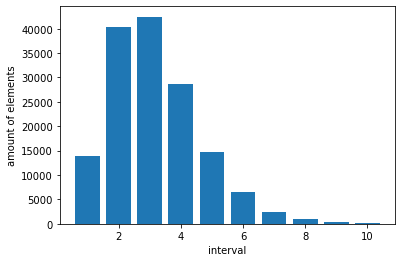

In [42]:
def main():
    k, lmb = 5, 2
    A, mu, d, res = gamma_hist(k, lmb, 100)
    print(res)
    plt.xlim(0, 10)
    x = np.linspace(0, 10, 10000)
    plt.hist(A, density=True, bins=10, label="Values")
    plt.plot(x, st.gamma.pdf(x, k, scale=1 / lmb), color="red")
    plt.ylabel('amount of elements')
    plt.xlabel('interval')
    plt.show()

    plt.plot([100 * i for i in range(len(mu))], mu)
    plt.plot([100, len(mu) * 100], [k / lmb] * 2)
    plt.xlabel('amount of elements')
    plt.ylabel('expected value')
    plt.show()

    plt.plot([100 * i for i in range(len(d))], d)
    plt.plot([100, len(d) * 100], [k / (lmb ** 2)] * 2)
    plt.xlabel('amount of elements')
    plt.ylabel('dispersion')
    plt.show()
    
    plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], res)
    plt.ylabel('amount of elements')
    plt.xlabel('interval')
    plt.show()

if __name__ == "__main__":
    main()
